## PROBLEM STATEMENT

Payment History. Payment history is the main factor to affect your credit score. ...
Amount of Debt. The amount of debt you owe accounts for 30% of your credit score. ...
Credit Age or Credit History. Credit age affects 15% of your overall score. ...
Account Mix. Credit mix accounts for 10% of your score. ...
Credit Inquiries.

#### Understanding the problem

 Since the aim is to predict a binary output for each applicant i.e the probability of each user to default;  It is crystal clear that this challenge is a Binary Classification problem. And we could understood that tri scenarios's Kowope's firm are pin pointing are; the great vision to provide quality goods, education and automobile services to its customers at affordable price and reduce if not eradicate charges on card payments... And most especially aiming to increase customer satisfaction with credit rewards that can be used within the Mall.... 
 
        Cool! Defintely Kowope firm seems to be aiming at minimal or optimal profit level and not bothered about his reduction in charges or other source of income in as much customer's sincerity, behaviour patronization and loyalty ; likewise profit are still in expected ranges based on return are inplace andare pay for goods even with zero-balance and then pay back within an agreed period of time. This innovative strategy has increased sales for the company. However, there has been recent cases of credit defaults and Kowope Mart will like to have a system that profiles customers who are worthy of the card with minimum if not zero risk of defaulting.. in prior to that, understanding the customer behaviour intents, abilities will help to have a well distinct solution for Kowope's mart.. So, Lets get started!!!

## HYPOTHESIS GENERATION

In [1]:
#Import necessary dependencies or frameworks or libraries
from plotly import graph_objs as go;import copy; import datetime;import gc; gc.collect()
import numpy as np;import pandas as pd, os, gc;import seaborn as sns;from tqdm import tqdm; import missingno as msno
from sklearn.model_selection import KFold,cross_val_score,GroupKFold,RepeatedKFold,StratifiedKFold,GridSearchCV,cross_validate
import plotly.express as px;import math
from scipy import stats;import statsmodels.api as sm;from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor
import time;import warnings;from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split; from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer; import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, log_loss;from sklearn.feature_selection import mutual_info_classif
import lightgbm as lgb;from sklearn import metrics; from scipy.optimize import minimize
from lightgbm import LGBMClassifier; from catboost import CatBoostClassifier
warnings.filterwarnings('ignore')
from typing import List
import perfplot

In [2]:
#Data path & csv files name extension
data_path='/Users/DELL/Desktop/Hackhathons/Kowope/Data/'
save_path='/Users/DELL/Desktop/Hackhathons/Kowope/Data/'
train='Train.csv';test='Test.csv';submission ='SampleSubmission.csv'

In [3]:
#define some fxn to read the data set
def read_train():
    train_data =pd.read_csv(data_path + train)
    return train_data
def read_test():
    test_data =pd.read_csv(data_path + test)
    return test_data
def read_submission():
    sample_submission =pd.read_csv(data_path + submission)
    return sample_submission
#Assign defined fxns to variables
train = read_train();test=read_test();submission=read_submission()

In [4]:
print('==' * 12);print('TEST DATA');print(test.shape)
print('==' * 15);print('TRAIN DATA');print(train.shape)
print('==' * 18);print('SUBMISSION SAMPLE DATA');print(submission.shape)

TEST DATA
(24000, 51)
TRAIN DATA
(56000, 52)
SUBMISSION SAMPLE DATA
(24000, 2)


In [5]:
#Lets Check for Item co-existence in Train/Test
for col in ['form_field47']:
    train_col = train[col].unique();test_col = test[col].unique()
    print ('Not in Test ' + col + ' ',[i  for i in train_col if i not in test_col]);print('---'*10)
    print ('Not in Train ' + col + ' ',[i  for i in test_col  if i not in train_col]);print('-' * 30)

Not in Test form_field47  []
------------------------------
Not in Train form_field47  []
------------------------------


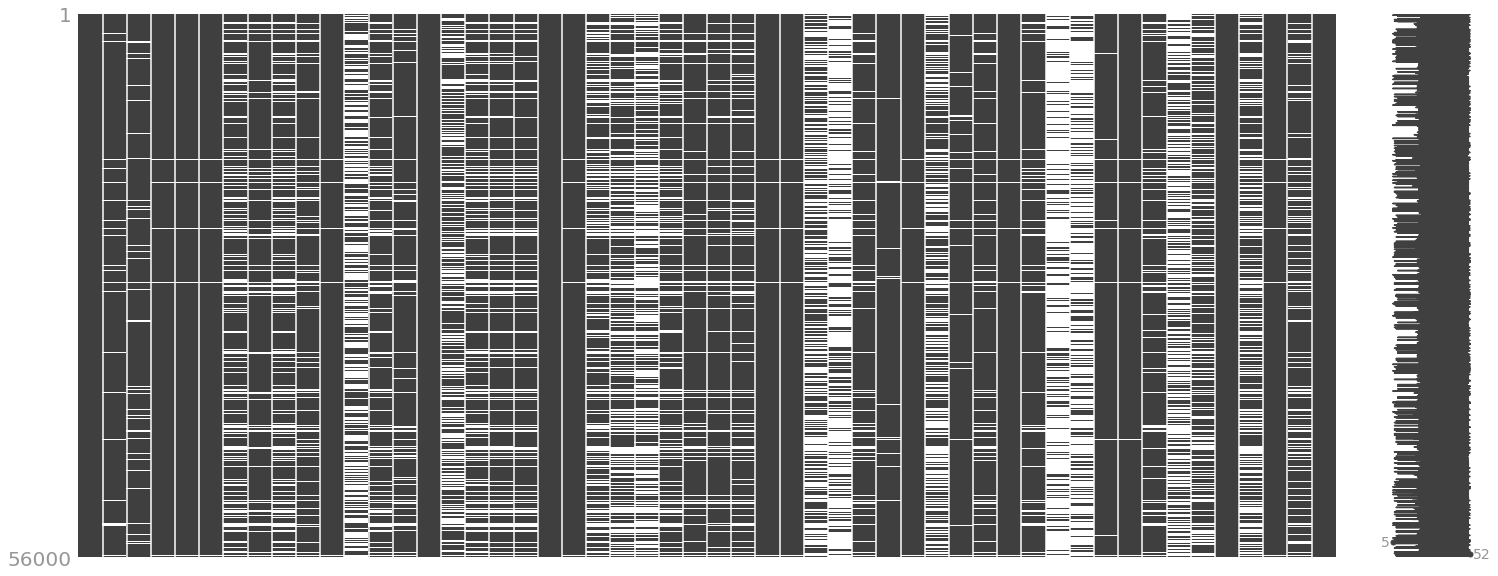

In [6]:
msno.matrix(train)

oops! there are a whole lot of missing information; we can infer from the chart above, the hatch white stripes pattern are denoting missing values; lets explore deeper to know how many instances are not missing

In [7]:
def setup(n):
    train = pd.DataFrame(np.random.randn(n))
    train[train > 0.1] = np.nan
    return train


def isnull_any(train):
    return train.isnull().any()


def isnull_values_sum(train):
    return train.isnull().values.sum() > 0


def isnull_sum(train):
    return train.isnull().sum() > 0


def isnull_values_any(train):
    return train.isnull().values.any()


perfplot.save(
    "out.png",
    setup=setup,
    kernels=[isnull_any, isnull_values_sum, isnull_sum, isnull_values_any],
    n_range=[2 ** k for k in range(25)],
)

Output()

In [8]:
def missingvaluecol(check_dff,threshold):
    l = []
    l = list(check_dff.drop(check_dff.loc[:,list((100*(check_dff.isnull().sum()/len(check_dff.index))>=threshold))].columns, 1).columns.values)
    print("# Columns having more than %s percent missing values:"%threshold,(check_dff.shape[1] - len(l)))
    print("Columns:\n",list(set(list((check_dff.columns.values))) - set(l)))
    return l

missingvaluecol(train,70) 


# Columns having more than 70 percent missing values: 2
Columns:
 ['form_field31', 'form_field40']


['Applicant_ID',
 'form_field1',
 'form_field2',
 'form_field3',
 'form_field4',
 'form_field5',
 'form_field6',
 'form_field7',
 'form_field8',
 'form_field9',
 'form_field10',
 'form_field11',
 'form_field12',
 'form_field13',
 'form_field14',
 'form_field15',
 'form_field16',
 'form_field17',
 'form_field18',
 'form_field19',
 'form_field20',
 'form_field21',
 'form_field22',
 'form_field23',
 'form_field24',
 'form_field25',
 'form_field26',
 'form_field27',
 'form_field28',
 'form_field29',
 'form_field30',
 'form_field32',
 'form_field33',
 'form_field34',
 'form_field35',
 'form_field36',
 'form_field37',
 'form_field38',
 'form_field39',
 'form_field41',
 'form_field42',
 'form_field43',
 'form_field44',
 'form_field45',
 'form_field46',
 'form_field47',
 'form_field48',
 'form_field49',
 'form_field50',
 'default_status']

In [9]:
#columns with float data types
float_dtypes = train.loc[:, train.dtypes == np.float64];float_dtypes.columns

Index(['form_field1', 'form_field2', 'form_field3', 'form_field4',
       'form_field5', 'form_field6', 'form_field7', 'form_field8',
       'form_field9', 'form_field10', 'form_field11', 'form_field12',
       'form_field13', 'form_field15', 'form_field16', 'form_field17',
       'form_field18', 'form_field19', 'form_field20', 'form_field21',
       'form_field22', 'form_field23', 'form_field24', 'form_field25',
       'form_field26', 'form_field27', 'form_field28', 'form_field29',
       'form_field30', 'form_field31', 'form_field32', 'form_field33',
       'form_field34', 'form_field35', 'form_field36', 'form_field37',
       'form_field38', 'form_field39', 'form_field40', 'form_field41',
       'form_field42', 'form_field43', 'form_field44', 'form_field45',
       'form_field46', 'form_field48', 'form_field49', 'form_field50'],
      dtype='object')

In [10]:
#columns with integer data types
int_dtypes = train.loc[:, train.dtypes == np.int64];int_dtypes.columns

Index(['form_field14'], dtype='object')

In [11]:
#columns with object data types
object_dtypes = train.loc[:, train.dtypes == np.object];object_dtypes.columns

Index(['Applicant_ID', 'form_field47', 'default_status'], dtype='object')

In [12]:
train['form_field11'].nunique()

9508

## UNIVARIATE ANALYSIS

In [13]:
def UNIVARIATE_SUMMARY(train):
    print('==' * 15, 'KOWOPE MART ANALYSIS', '==' * 15)
    time.sleep(1.5)
    print('Customer Creditworthiness - There are ',train.form_field1.nunique(), 'unique Identities')
    print('Unique_Product_ID - There are ',train.form_field47.nunique(), 'applied for')
    print('MINMAX NO OF DAYS  - Min NO OF DAYS of',train.form_field14.min(), 'and Max NO of',
          train.form_field14.max())
    print('MINMAX SALARY OF CUSTOMERS - Min Salary of',train.form_field28.min(), 'and Max Salary of',
          train.form_field28.max())
    print('SUM OF AMOUNT DUE -',  'MIN',train.form_field11.min()*100, 'MEAN' ,
          np.round(train.form_field11.mean(),3)*100,
         'MAX',np.round(train.form_field11.max()*100,2));print('***')
    print('CUSTOMERS INCOME  RANGES BETWEEN',np.round(train.form_field28.min(),2),
          ' - ',np.round(train.form_field28.max(),2),'Naira')


In [14]:
UNIVARIATE_SUMMARY(train)

============================== KOWOPE MART ANALYSIS ==============================
Customer Creditworthiness - There are  449 unique Identities
Unique_Product_ID - There are  2 applied for
MINMAX NO OF DAYS  - Min NO OF DAYS of 0 and Max NO of 385498999611
MINMAX SALARY OF CUSTOMERS - Min Salary of 0.0 and Max Salary of 60772.0
SUM OF AMOUNT DUE - MIN 0.0 MEAN 205471476.0 MAX 17074299200.0
***
CUSTOMERS INCOME  RANGES BETWEEN 0.0  -  60772.0 Naira


In [15]:
des = train.describe()
des.loc['+3_std'] = des.loc['mean'] + (des.loc['std'] * 3)
des.loc['-3_std'] = des.loc['mean'] - (des.loc['std'] * 3)
des

form_field1   form_field2   form_field3   form_field4   form_field5  \
count   53471.000000  52156.000000  55645.000000  55645.000000  55645.000000   
mean     3491.795665      0.550737      1.052225      0.851979      1.956317   
std       188.462426      0.820979      2.147768      3.157692     10.512396   
min      2990.000000      0.000000      0.000000      0.000000      0.000000   
25%      3358.000000      0.070788      0.000000      0.000000      0.000000   
50%      3484.000000      0.267575      0.062000      0.000000      0.000000   
75%      3620.000000      0.719512      1.282000      0.000000      0.000000   
max      3900.000000     18.015050     57.371600     91.672200    407.748600   
+3_std   4057.182944      3.013674      7.495529     10.325055     33.493504   
-3_std   2926.408386     -1.912201     -5.391079     -8.621097    -29.580871   

         form_field6   form_field7   form_field8   form_field9  form_field10  \
count   4.264000e+04  5.083700e+04  4.264000e+04  4.799200e+04  5.564500e+04   
mean    6.244479e+05  6.865210e+06  2.626690e+06  1.316002e+07  1.185585e+07   
std     1.433422e+06  1.912729e+07  3.927355e+06  1.977963e+07  2.669459e+07   
min     0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%     1.400400e+04  6.869740e+05  1.929440e+05  1.368502e+06  4.500730e+05   
50%     1.155330e+05  2.704328e+06  9.639420e+05  5.506295e+06  3.707559e+06   
75%     5.259280e+05  6.993831e+06  3.751516e+06  1.694552e+07  1.326101e+07   
max     5.313546e+07  2.158794e+09  1.037397e+08  3.200533e+08  2.191361e+09   
+3_std  4.924713e+06  6.424707e+07  1.440875e+07  7.249891e+07  9.193963e+07   
-3_std -3.675817e+06 -5.051665e+07 -9.155374e+06 -4.617888e+07 -6.822793e+07   

        ...  form_field40  form_field41  form_field42  form_field43  \
count   ...  12271.000000  17771.000000  54677.000000  55432.000000   
mean    ...    147.797977    108.117363      0.368215      6.634511   
std     ...     45.085889     36.765769      0.412858      6.378946   
min     ...      0.021000      0.000000      0.000000      0.000000   
25%     ...    136.191750     87.055500      0.000000      2.020000   
50%     ...    150.000000    118.441500      0.220000      5.050000   
75%     ...    167.754000    137.496750      0.628573     10.100000   
max     ...    645.450000    255.000000      2.200000     91.910000   
+3_std  ...    283.055644    218.414671      1.606791     25.771351   
-3_std  ...     12.540310     -2.179944     -0.870360    -12.502328   

        form_field44  form_field45  form_field46  form_field48  form_field49  \
count   50617.000000  24683.000000  40096.000000  3.511100e+04  55645.000000   
mean        0.563377      0.072520      0.095371  3.052449e+05      1.049061   
std         0.196973      0.291146      0.335210  1.647757e+06      1.806160   
min         0.048528      0.000000      0.000000  0.000000e+00      0.000000   
25%         0.411672      0.000000      0.000000  7.710079e+01      0.000000   
50%         0.588648      0.000000      0.000000  3.181243e+02      0.000000   
75%         0.753840      0.000000      0.000000  1.153022e+03      1.181754   
max         0.800000      5.000000      5.000000  5.321014e+07     28.000000   
+3_std      1.154295      0.945957      1.101001  5.248517e+06      6.467542   
-3_std     -0.027542     -0.800918     -0.910258 -4.638027e+06     -4.369421   

        form_field50  
count   4.494400e+04  
mean    6.005862e+05  
std     5.842405e+06  
min     0.000000e+00  
25%     4.560141e-02  
50%     1.703996e-01  
75%     4.993370e-01  
max     2.307571e+08  
+3_std  1.812780e+07  
-3_std -1.692663e+07  

[10 rows x 49 columns]

In [16]:
form_field47=train["form_field47"].value_counts()
fig = px.pie(form_field47,
             values=form_field47.values,
             names=form_field47.index,
             title="All Customer Products Per Product Type",
             template="seaborn")
fig.update_traces(rotation=-60, textinfo="percent+label")
fig.show()

## BIVARIATE ANALYSIS

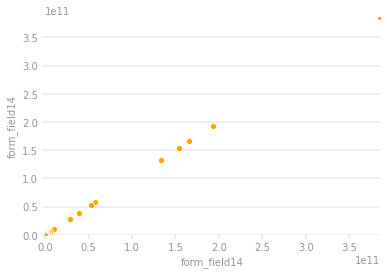

In [18]:
sns.scatterplot (x='form_field14', y='form_field14', data=train,color='orange')

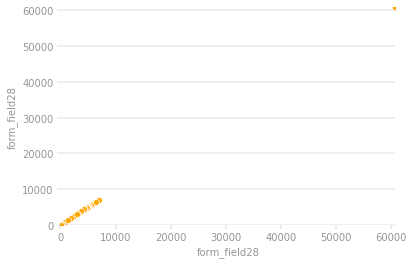

In [119]:
sns.scatterplot (x='form_field28', y='form_field28', data=train,color='orange')

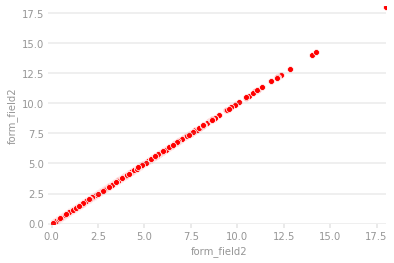

In [120]:
sns.scatterplot (x='form_field2', y='form_field2', data=train,color='RED')

In [121]:
cust_id = train.groupby('default_status').count()['Applicant_ID'].reset_index().sort_values(by='Applicant_ID',ascending=True)
cust_id.style.background_gradient(cmap='Greens')

In [122]:
train['default_status']= train['default_status'].replace({'yes': 1,'no': 0})

In [123]:
#density plot
def kdeplot(feature):
    facet =sns.FacetGrid(train, hue='default_status', aspect=5)
    facet.map(sns.kdeplot, feature, shade=True)
    facet.set(xlim=(train[feature].min() ,train[feature].max()))
    facet.add_legend()

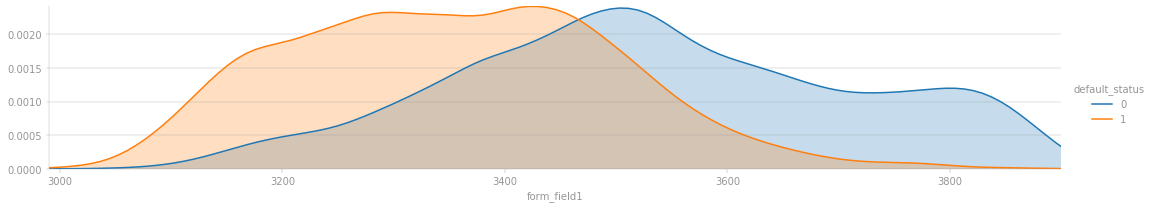

In [124]:
kdeplot('form_field1')

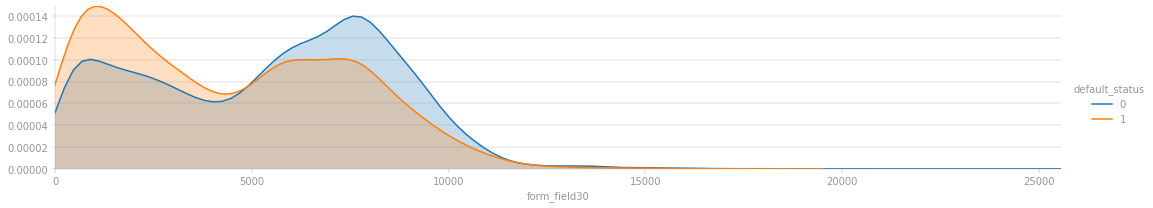

In [125]:
kdeplot('form_field30')

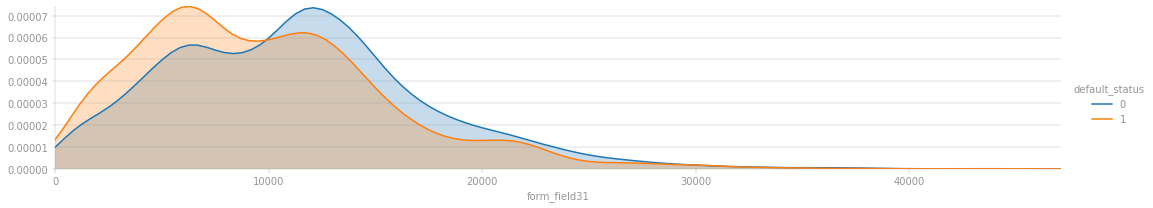

In [126]:
kdeplot('form_field31')

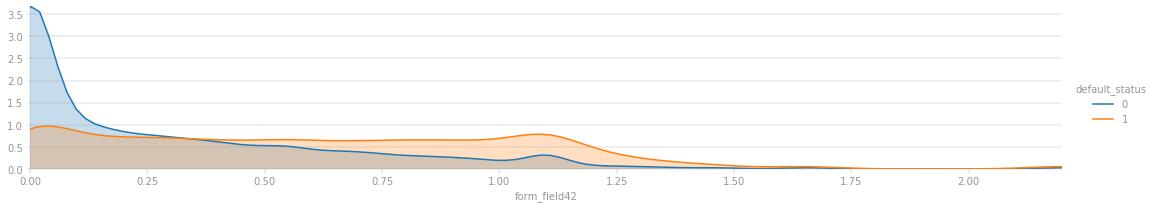

In [127]:
kdeplot('form_field42')

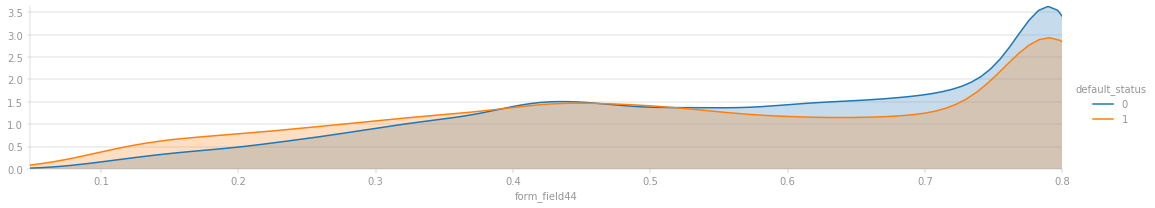

In [128]:
kdeplot('form_field44')

# MULTIVARIATE ANALYSIS

Credit worthiness Financial impact


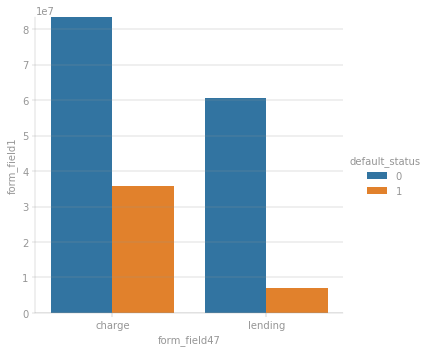

In [130]:
print('Credit worthiness Financial impact')
sns.catplot(x='form_field47', y='form_field1', hue='default_status', estimator=sum, ci=None, kind='bar', data=train)
plt.show()

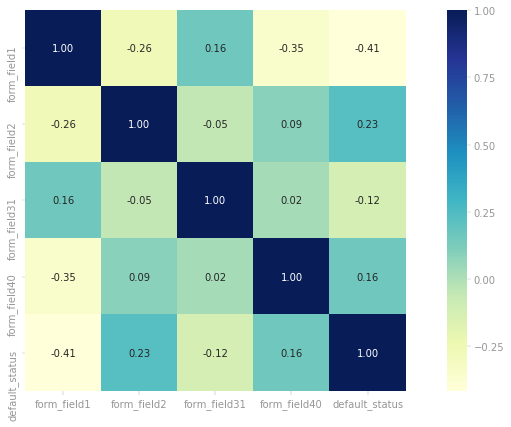

In [131]:
#correlelogram- plot heatmap to find correlation among features
corrmat =train.corr()
f, ax = plt.subplots(figsize=(15,7))
sns.heatmap(train[['form_field1', 'form_field2','form_field31',
                   'form_field40','default_status']].corr(), square=True, cmap="YlGnBu", annot=True, fmt=".2f")

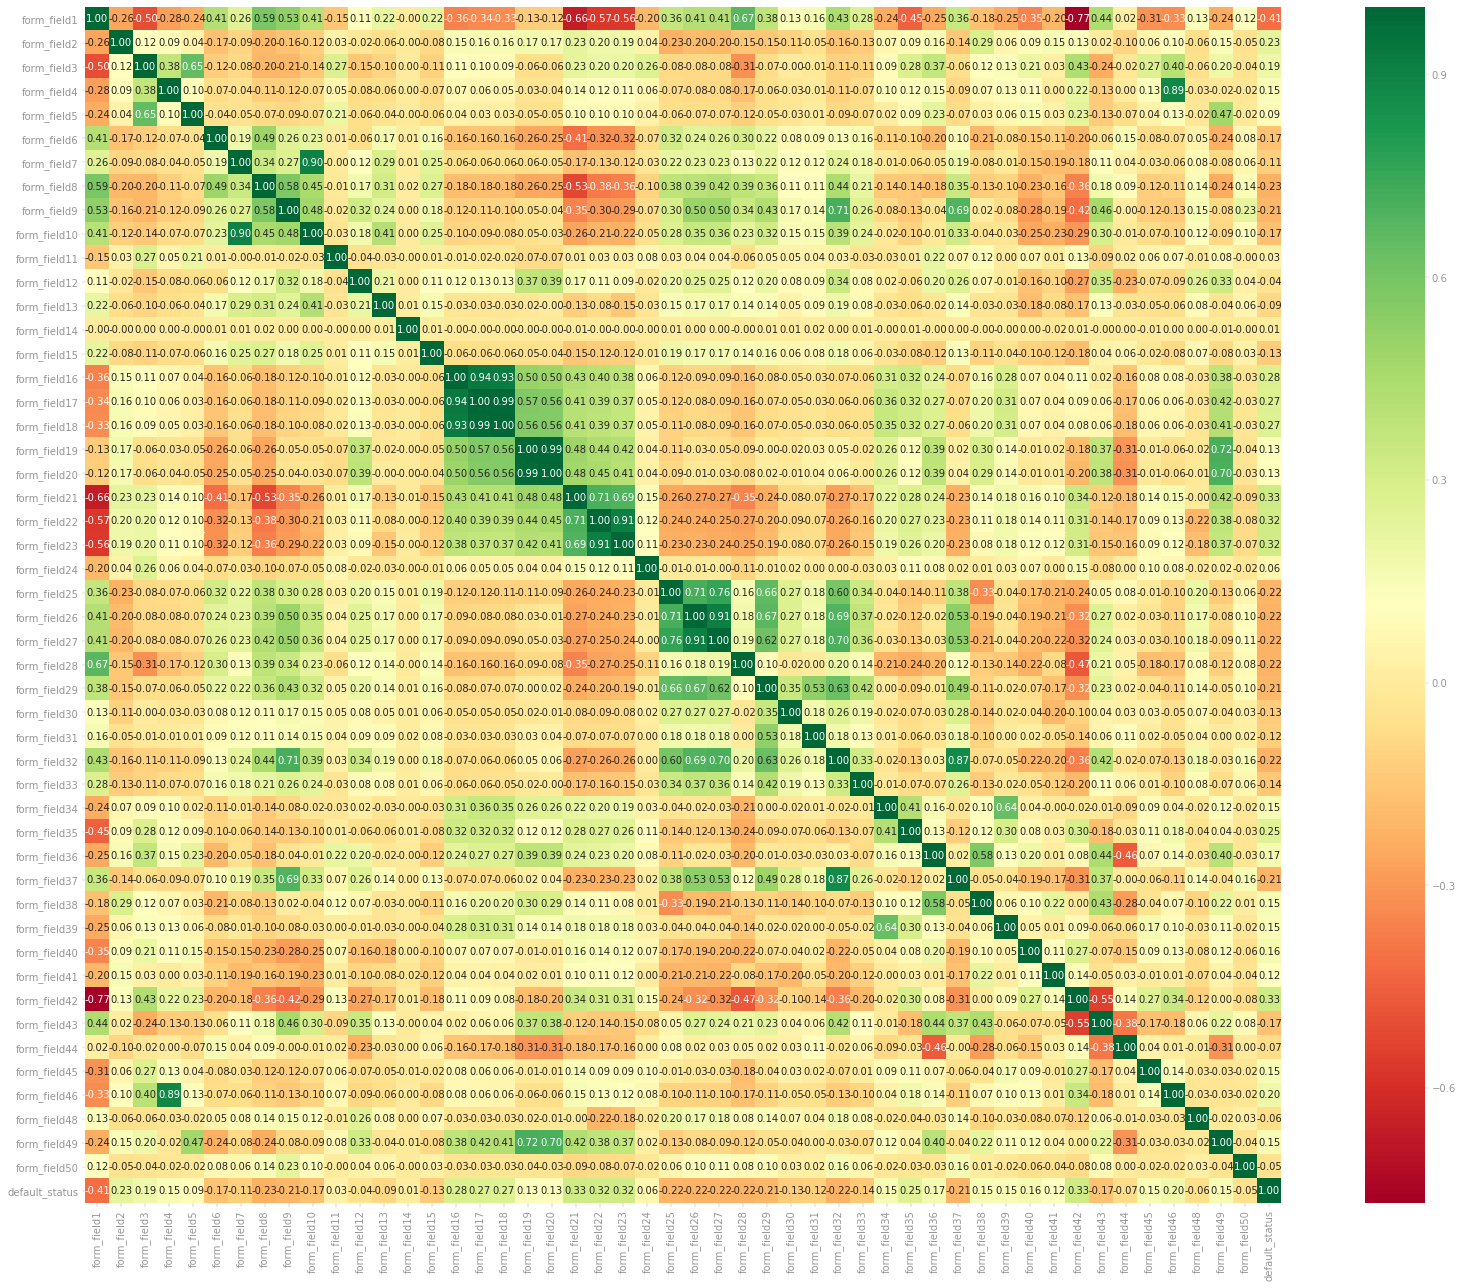

In [132]:
corrmat =train.corr()
f, ax = plt.subplots(figsize=(30,22))
sns.heatmap(train.corr(), square=True, cmap=plt.cm.RdYlGn, annot=True, fmt=".2f")

In [101]:
#train.drop(['Applicant_ID','form_field31', 'form_field40'], axis=1, inplace =True)
#test.drop(['Applicant_ID','form_field31', 'form_field40'], axis=1, inplace =True)
#train = train.dropna(thresh=6);train